<a href="https://colab.research.google.com/github/kowais915/deep-learning-416/blob/main/fashion_MNIST_with_custom_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
class Myclassback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get("accuracy") > 0.90:
      print("Accuracy reached 90%")
      self.model.stop_training = True


myclassback = Myclassback()

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
fmnist = tf.keras.datasets.fashion_mnist


In [ ]:
(x_train, y_labels), (x_test, y_test) = fmnist.load_data()


Visualizing the data

[[0.         0.         0.         0.         0.         0.00392157
  0.         0.         0.         0.         0.16078431 0.7372549
  0.40392157 0.21176471 0.18823529 0.16862745 0.34117647 0.65882353
  0.52156863 0.0627451  0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.00392157 0.         0.
  0.         0.19215686 0.53333333 0.85882353 0.84705882 0.89411765
  0.9254902  1.         1.         1.         1.         0.85098039
  0.84313725 0.99607843 0.90588235 0.62745098 0.17647059 0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05490196
  0.69019608 0.87058824 0.87843137 0.83137255 0.79607843 0.77647059
  0.76862745 0.78431373 0.84313725 0.8        0.79215686 0.78823529
  0.78823529 0.78823529 0.81960784 0.85490196 0.87843137 0.64313725
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.7372549
 

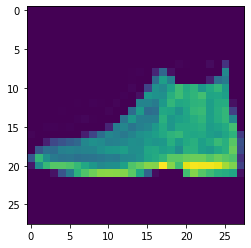

In [ ]:
print(x_train[1])
print(y_labels[1])


plt.imshow(x_test[0])

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
ann = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
ann.compile(
  optimizer=tf.optimizers.Adam(),
  loss = 'sparse_categorical_crossentropy',
  metrics=['accuracy']
)

In [ ]:
ann.fit(x_train, y_labels, epochs=10, callbacks=[myclassback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4933 - accuracy: 0.8267
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3691 - accuracy: 0.8666
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3313 - accuracy: 0.8794
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3097 - accuracy: 0.8853
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2915 - accuracy: 0.8927
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2774 - accuracy: 0.8975
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2654 - accuracy: 0.9023


In [ ]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3592 - accuracy: 0.8716


[0.359153151512146, 0.8715999722480774]

In [ ]:
arr = ann.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
print(arr[0])

[4.13423180e-07 9.64592672e-08 2.01409239e-06 7.30974352e-06 1.31409979e-05 1.18273176e-01 7.67116126e-06 2.40244389e-01 4.90487041e-03 6.36546910e-01]
